<a href="https://colab.research.google.com/github/cax68080/google_colab/blob/main/%E4%BA%BA%E5%B7%A5%E7%9F%A5%E8%83%BD%E6%8A%80%E8%A1%93%E3%81%AE%E6%95%99%E7%A7%91%E6%9B%B8_20220810.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 4 簡単なディープラーニング

## 4.1 ディープラーニングの概要

## 4.2 シンプルなディープラーニングの実装

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from keras.utils import np_utils

In [4]:
iris = datasets.load_iris()
print(iris.data[:10])
print(iris.data.shape)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# ---- 入力データ ----
scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

# --- 正解データ ---
t = np_utils.to_categorical(iris.target)
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
!pip install --upgrade tensorflow

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [6]:
# x_train: 訓練用の入力データ
# x_test:　テスト用の入力データ
# y_train:　訓練用の正解データ
# y_test：テスト用の正解データ
# train_size=0.75: 75%が訓練用、25%がテスト用
x_train,x_test,y_train,y_test = train_test_split(x,t,train_size=0.75)

In [7]:
model = Sequential()
model.add(Dense(32,input_dim=4))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainabl

In [9]:
# 学習
history = model.fit(x_train,y_train,epochs=30,batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 2ms/step - loss: 1.0582 - accuracy: 0.2411
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9788 - accuracy: 0.6607
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9110 - accuracy: 0.7232
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8507 - accuracy: 0.7411
Epoch 5/30
14/14 [==============================] - 0s 3ms/step - loss: 0.7953 - accuracy: 0.7411
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7431 - accuracy: 0.8036
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.8214
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.8214
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.8482
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.8571
Epoch 11/30
14/14 [

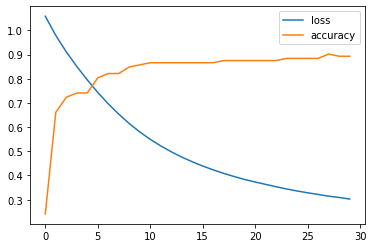

In [12]:
# 学習の推移を表示する。
hist_loss = history.history['loss']
hist_acc = history.history['accuracy']
plt.plot(np.arange(len(hist_loss)),hist_loss,label='loss')
plt.plot(np.arange(len(hist_acc)),hist_acc,label='accuracy')
plt.legend()
plt.show()

In [13]:
# モデルの評価をする
loss,accurancy = model.evaluate(x_test,y_test)
print("誤差：",loss,"精度：",accurancy)


2/2 [==============================] - 0s 12ms/step - loss: 0.3123 - accuracy: 0.8947
誤差： 0.31228262186050415 精度： 0.8947368264198303


In [14]:
# 予測
t_test = model.predict(x_test)
print(t_test[:10])

2/2 [==============================] - 0s 8ms/step
[[0.98122483 0.00910637 0.00966885]
 [0.0645742  0.39806503 0.53736085]
 [0.96275526 0.01900898 0.01823574]
 [0.0206869  0.21249299 0.76682013]
 [0.02115054 0.17624421 0.80260533]
 [0.9426154  0.02980782 0.02757676]
 [0.07729375 0.70011747 0.22258864]
 [0.9765163  0.01141776 0.01206587]
 [0.07062283 0.634197   0.29518017]
 [0.00297766 0.04491347 0.9521088 ]]


In [16]:
# モデルの保存
model.save('model.h5')
load_model('model.h5')